In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

from scipy.stats import ttest_1samp
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import ttest_ind,ttest_ind_from_stats 

<font size=14>**Problem Statement**<font> 

We need to test the relationship of various variables with the count(no . of rented bicyles )


<font size=6>**EDA**<font> 

In [2]:
df=pd.read_csv(r"C://Users//bike_sharing.csv")

In [3]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
df.shape

(10886, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


<font size="10">**Categorical Conversion**<font>

In [6]:
cols = ['season', "holiday", 'workingday',"weather"]
df[cols] = df[cols].astype('object')

In [7]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


<font size="10">**Missing Values**<font>

1. There seems to be no missing values 

In [9]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


<font size="8">**#OUTLIER DETECTION**<font>

<AxesSubplot:xlabel='count'>

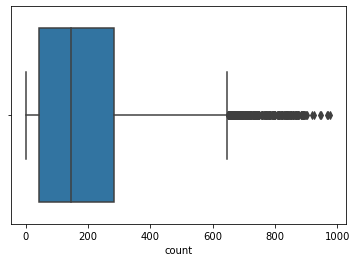

In [10]:
sns.boxplot(x=df["count"])

<font size="8">**#OUTLIER TREATMENT**<font>

In [11]:
a=df["count"].quantile(0.75)
b=df["count"].quantile(0.25)

In [12]:
print(a,b)

284.0 42.0


In [13]:
iqr=a-b
iqr

242.0

In [14]:
lower_lim= b-1.5*iqr
upper_lim=a+1.5*iqr
print(lower_lim,upper_lim)

-321.0 647.0


In [15]:
new_df_cap = df.copy()




In [16]:
new_df_cap['count'] = np.where(
    new_df_cap['count'] > upper_lim,upper_lim,np.where(new_df_cap['count'] < lower_lim,lower_lim,new_df_cap['count']))

In [17]:
new_df_cap

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336.0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241.0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168.0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129.0


<font size="8">**#UNIVARIATE ANALSYIS**<font>

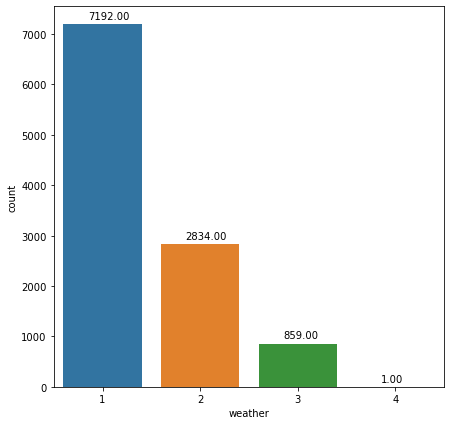

In [18]:
plt.figure(figsize=(7,7))
p=sns.countplot(x=new_df_cap["weather"])
for i in p.patches:
    plt.annotate("{:.2f}".format(i.get_height()),(i.get_x()+0.25,i.get_height()),xytext=(0,5),textcoords= "offset points")
plt.show()

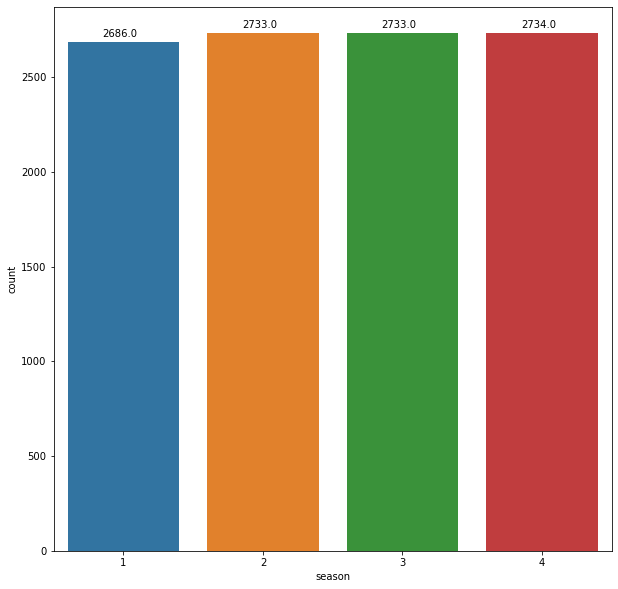

In [19]:
plt.figure(figsize=(10,10))
a=sns.countplot(x="season",data=new_df_cap)
for p in a.patches:
    a.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01) ,xytext = (0,5), textcoords = 'offset points')
plt.show()

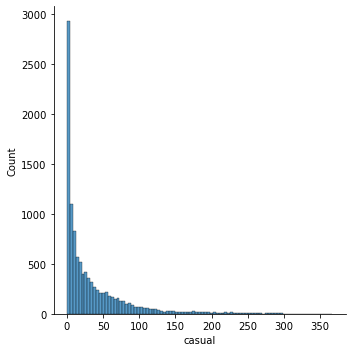

In [20]:
sns.displot(x=new_df_cap["casual"])
plt.show()

<AxesSubplot:xlabel='casual'>

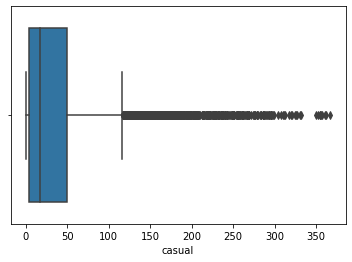

In [21]:
sns.boxplot(x=new_df_cap["casual"])

In [22]:
new_df_cap["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

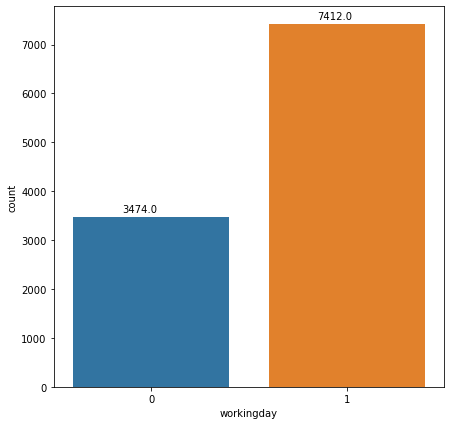

In [23]:
plt.figure(figsize=(7,7))
ax = sns.countplot(x="workingday", data=new_df_cap)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01) ,xytext = (0,5), textcoords = 'offset points')


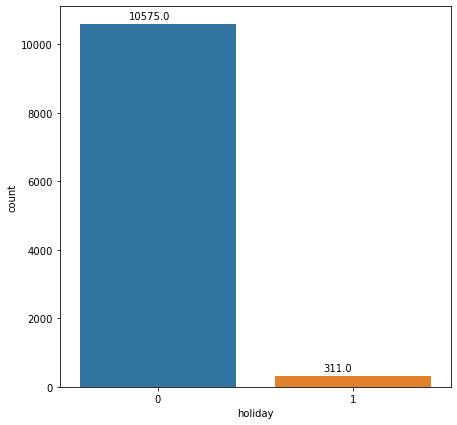

In [24]:
plt.figure(figsize=(7,7))
ax = sns.countplot(x="holiday", data=new_df_cap)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01) ,xytext = (0,5), textcoords = 'offset points')


<font size="8">**Observation**<font>

1. All the seasons have approx equal weightage in their occurences.
2. Most of the times the weather tended to be :- **Clear, Few clouds, partly cloudy, partly cloudy**
    followed by :-  **Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist**
3. Casual No . of users have right skewed distribution i.e has a huge spread from 0-396 and large number of outliers .
4.  working days:7412  &   weekends or holidays : 3474
5. holidays:- 311 & non holidays : 10575

#CREATING BINS TO MAKE THE ANALYSIS EASIER 

In [25]:
new_df_cap["humidity"]=pd.qcut(new_df_cap["humidity"],[0, .25, .5, .75, 1.],labels=["Low","Medium","High","Very high"] )


In [26]:
new_df_cap["temp"]=pd.qcut(new_df_cap["temp"],[0, .25, .5, .75, 1.],labels=["very cold","cold","room temp","above room temp"])

In [27]:
new_df_cap["atemp"]=pd.qcut(new_df_cap["atemp"],[0, .25, .5, .75, 1.],labels=["Low","Medium","High","Very high"] )

In [28]:
new_df_cap["windspeed"]=pd.qcut(new_df_cap["windspeed"],[0, .25, .5, .75, 1.],labels=["Low","Medium","High","Very high"] )

In [29]:
new_df_cap

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,very cold,Low,Very high,Low,3,13,16.0
1,2011-01-01 01:00:00,1,0,0,1,very cold,Low,Very high,Low,8,32,40.0
2,2011-01-01 02:00:00,1,0,0,1,very cold,Low,Very high,Low,5,27,32.0
3,2011-01-01 03:00:00,1,0,0,1,very cold,Low,High,Low,3,10,13.0
4,2011-01-01 04:00:00,1,0,0,1,very cold,Low,High,Low,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,cold,Medium,Medium,Very high,7,329,336.0
10882,2012-12-19 20:00:00,4,0,1,1,cold,Medium,Medium,High,10,231,241.0
10883,2012-12-19 21:00:00,4,0,1,1,very cold,Low,Medium,High,4,164,168.0
10884,2012-12-19 22:00:00,4,0,1,1,very cold,Medium,Medium,Low,12,117,129.0


In [30]:
new_df_cap["windspeed"]

0              Low
1              Low
2              Low
3              Low
4              Low
           ...    
10881    Very high
10882         High
10883         High
10884          Low
10885       Medium
Name: windspeed, Length: 10886, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very high']

<font size="14">**Bi-Variate Analysis**<font>

<AxesSubplot:xlabel='season', ylabel='count'>

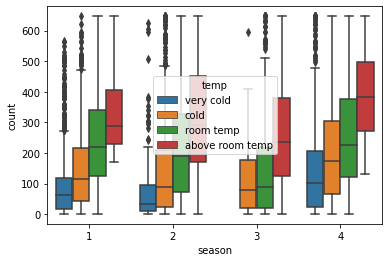

In [31]:
sns.boxplot(x="season",y="count",hue="temp",data=new_df_cap)

<AxesSubplot:xlabel='casual', ylabel='registered'>

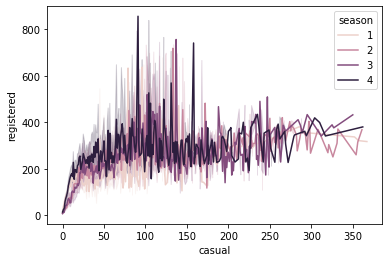

In [32]:
sns.lineplot(x="casual",y="registered",hue="season",data=new_df_cap)

<AxesSubplot:>

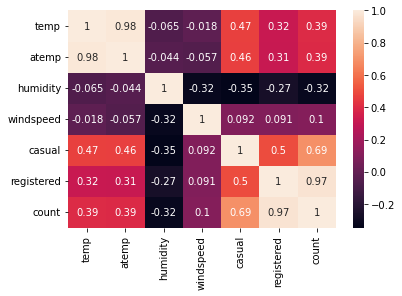

In [33]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='season', ylabel='count'>

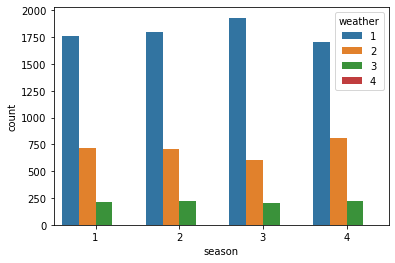

In [34]:
sns.countplot(x="season",hue="weather",data=new_df_cap)

<AxesSubplot:xlabel='season', ylabel='count'>

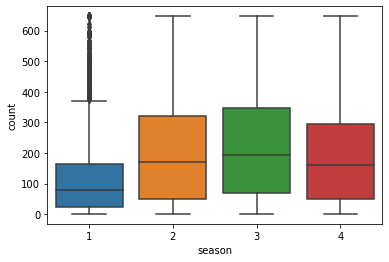

In [35]:
sns.boxplot(x="season",y="count",data=new_df_cap)

<AxesSubplot:xlabel='weather', ylabel='count'>

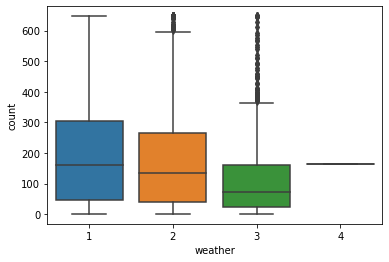

In [36]:
sns.boxplot(x="weather",y="count",data=new_df_cap)

<AxesSubplot:xlabel='weather', ylabel='count'>

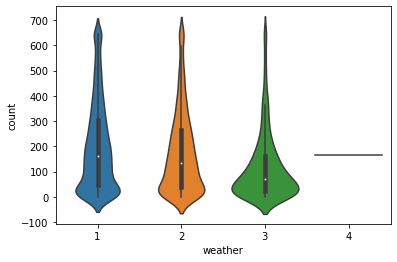

In [37]:
sns.violinplot(x="weather",y="count",data=new_df_cap)

<AxesSubplot:xlabel='season', ylabel='count'>

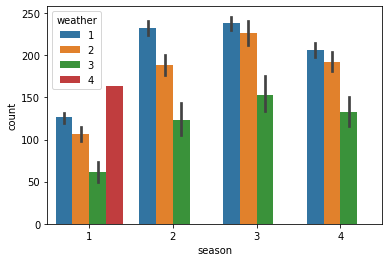

In [38]:
sns.barplot(x="season",y="count",hue="weather",data=new_df_cap)

<AxesSubplot:xlabel='season', ylabel='casual'>

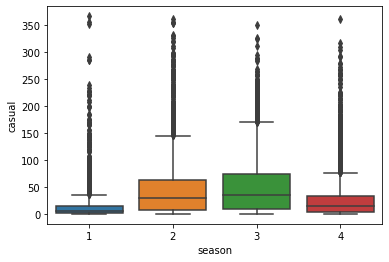

In [39]:
sns.boxplot(x="season",y="casual",data=new_df_cap)

<AxesSubplot:xlabel='weather', ylabel='casual'>

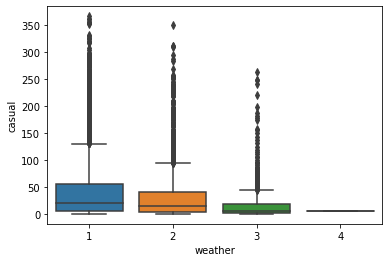

In [40]:
sns.boxplot(x="weather",y="casual",data=new_df_cap)

<AxesSubplot:xlabel='workingday', ylabel='count'>

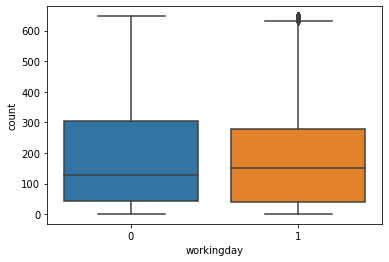

In [41]:
sns.boxplot(x="workingday",y="count",data=new_df_cap)

<AxesSubplot:xlabel='casual', ylabel='registered'>

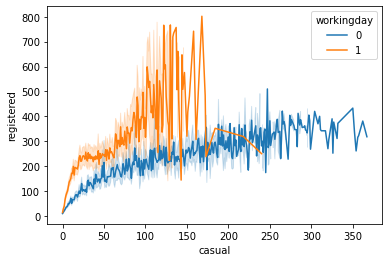

In [42]:
sns.lineplot(x="casual",y="registered",hue="workingday",data=new_df_cap)

<AxesSubplot:xlabel='holiday', ylabel='count'>

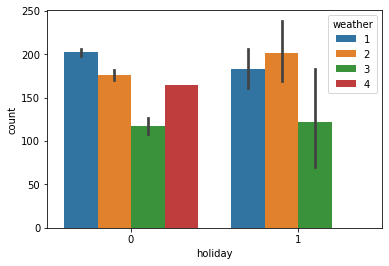

In [43]:
sns.barplot(x="holiday",y="count",hue="weather",data=new_df_cap)

<AxesSubplot:xlabel='workingday', ylabel='count'>

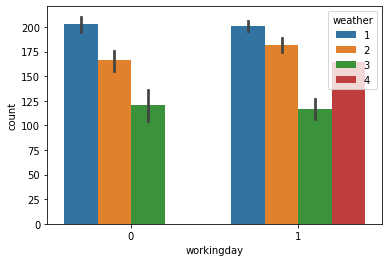

In [44]:
sns.barplot(x="workingday",y="count",hue="weather",data=new_df_cap)

<AxesSubplot:xlabel='humidity', ylabel='count'>

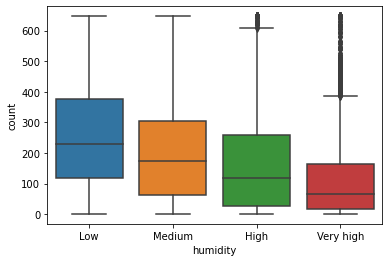

In [45]:
sns.boxplot(x="humidity",y="count",data=new_df_cap)

<AxesSubplot:xlabel='temp', ylabel='count'>

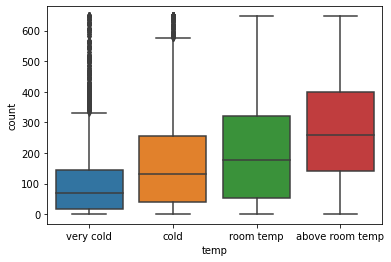

In [46]:
sns.boxplot(x="temp",y="count",data=new_df_cap)

<font size="4">**Observation**<font>

1. It is very clearly visible as the temperature rises FROM VERY COLD TO COLD to normal and above room temperatures , people prefer taking bicyles .
2. Whether it is Working Day or not does not greatly affect the number of rented bicyles i.e count
3. Also in every season , weather 1 is more preferred and more number of transaaaction are there in weather 1 as more pleasnt weather
4. No. of biclyes rented  are the **most** in 3rd Season , it has the greatest count .
5. **MEAN** No . of bicyles rented are the most  in weather 1 :-  i.e **Clear, Few clouds, partly cloudy, partly cloudy**
6. The distribtuion of rented cycles is concentraed at around 0-200 for all weathers.
7. It is seen that in every season , weather 1 is where most number of bicyles are rented .


<font size="4"><font color='red'>**Interesting Observation**<font>

1. One interesting thing :- in season 1 weather 4 comes out as an exception , will need more depth inlook .
2. Also one interesting fact is that the **total no of rented bicyles** is **not affected by working day** becasue **on holiday casual number of bicylce takes increase and compensate for loss in registred daily users .    


<font size="4">**Comments**<font>

1. There is strong correlation bw atemp and count .
2. There is strong correlation bw temp and count. 
3. Humidity tends to reduce the the count of rented bicyles as it has negative correlation
4. Windspeed  is negatively correlated to humidity .
5. weather 2 is more suitable if it happens to be a holiday and rented cycles demand increases .
   weather 2 is more in demand whether it is a holiday or working day .
6. As humidity varies , days with less humidity are more favourbale as compared to more humidity .

<font size="4">**2 SAMPLE TTEST:-WORKINGDAY VS COUNT**<font>

1. * H0:- means of independent sample are same i.e working day does not affect 
   * Ha:- means are different( 2 tailed test) i.e working day affects 
2. confidence levvel =99%
3. significance = 1-0.9 =0.01
4. alpha=0.01
5. test stattistic t

In [47]:
s1=300
s2=500
alpha=0.01

In [48]:
a=new_df_cap[new_df_cap["workingday"]==0].sample(s1)["count"]
a_mean=new_df_cap[new_df_cap["workingday"]==0].sample(s1)["count"].mean()
a_std=new_df_cap[new_df_cap["workingday"]==0].sample(s1)["count"].std()

In [49]:
b=new_df_cap[new_df_cap["workingday"]==1].sample(s2)["count"]
b_mean=new_df_cap[new_df_cap["workingday"]==1].sample(s2)["count"].mean()
b_std=new_df_cap[new_df_cap["workingday"]==1].sample(s2)["count"].std()

In [50]:
ttest_stat, p_value=ttest_ind_from_stats(a_mean,a_std,s1,b_mean,b_std,s2)

In [51]:
p_value

0.7132331834791275

In [52]:
if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Fail to Reject Null Hypothesis


<font size="4">**ANOVA TEST :- SEASON VS COUNT**<font>



1. * H0:- means of independent sample are same i.e different season does not affect count no. of rented cycles
   * Ha:- means are different( 2 tailed test) i.e different season affects no. of rented cycles
2. confidence level =99%
3. significance = 1-0.9 =0.01
4. alpha=0.01
5. test stattistic t

In [53]:
alpha=0.01

In [54]:
set_1=new_df_cap[new_df_cap["season"]==1]["count"]
set_2=new_df_cap[new_df_cap["season"]==2]["count"]
set_3=new_df_cap[new_df_cap["season"]==3]["count"]
set_4=new_df_cap[new_df_cap["season"]==4]["count"]         

In [55]:
f_stat,p_value =f_oneway(set_1,set_2,set_3,set_4)
f_stat,p_value

(243.33766355201303, 7.771506553957677e-153)

In [56]:
if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


<font size="4">**ANOVA TEST :- WEATHER  VS COUNT**<font>



1. * H0:- means of independent sample are same i.e different weather  does not affect count no. of rented cycles
   * Ha:- means are different( 2 tailed test) i.e different weather  affects no. of rented cycles
2. confidence level =99%
3. significance = 1-0.9 =0.01
4. alpha=0.01
5. test stattistic :- F_ratio

In [57]:
dist_1=new_df_cap[new_df_cap["weather"]==1]["count"]
dist_2=new_df_cap[new_df_cap["weather"]==2]["count"]
dist_3=new_df_cap[new_df_cap["weather"]==3]["count"]
dist_4=new_df_cap[new_df_cap["weather"]==4]["count"]   

In [58]:
f_stat, p_value=f_oneway(dist_1,dist_2,dist_3,dist_4)
f_stat, p_value

(68.4116520342703, 8.034967610817961e-44)

In [59]:
if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


<font size="4">**CHI-SQUARE TEST :- WEATHER VS SEASON**<font>



1. * H0:- means of independent sample are same i.e different seasons does not affect different weathers
   * Ha:- means are different( 2 tailed test) i.e different seasons affects different weather
2. confidence level =99%
3. significance = 1-0.9 =0.01
4. alpha=0.01

5. test stattistic :- Chi2_statistic

In [60]:
data=pd.crosstab(index=new_df_cap["season"],columns=new_df_cap["weather"])

In [61]:
data

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [62]:
chi_stat, p_value, dof, expected=chi2_contingency(data)
p_value

1.549925073686492e-07

In [63]:
if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


<font size="14">**INFERENCE**<font>

1. 2_sample Ttest :- working day does not affect the the number of rented bicyles hence we fail to reject null hypothesis(the means are same both 
    when working day = 0 and working day =1 )
2. ANOVA Test( count vs season):- Season does affect the number of rented bicyles , hence null hypothesis rejected .
3. ANOVA Test( count vs weather):- Weather does affect the number of rented bicycles , hence the null hypotheis rejected.
4. Chi_2 Test ( season vs weather):- Weather and season are not dependent on each other .
    

<font size="14">**RECOMMENDATIONS**<font>

1. We should focus more on increasing the inventory when days are more favorable for weather 1 .
2. On weekends aad holidays if weather forecasts predict category 2: we should be ready to supplement the demand .
3. Also when it is time for season 3, we should be ready to supplement the demand .
4. **On holidays , as casual users increase , there should be interesting competetions , meetups, trek, cyclothons
    to convert those casual to registered **.
5. As there are more number of working days compared to holidays , the focus should be on more awareness 
    campaigns about climate change , therrby increasing the use of our bikes .
6. On days with lower humidity and normal temperatures lie the golden opportunity to increase revenue 
7. Windspeeds also will be favorable to manage the inventory if prior forecasts are available .
